<a href="https://colab.research.google.com/github/romitnoelsinghlyit/Assignment/blob/master/Big_Data_Analytics_Technical_Project_L00130450_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

In [ ]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from pandas import ExcelWriter
from pandas import ExcelFile

In [ ]:
#Using Goggle Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Chicago crime dataset
chicago_crime_df = pd.read_csv('/content/drive/MyDrive/TP_Datasets/Crimes_-_2001_to_Present.csv')

# Remome Nan (Null)
chicago_crime_df.dropna()
#Remove duplicate records
chicago_crime_df.drop_duplicates("ID")
#Reindex and sort the data datewise in an ascending order
crime_df = chicago_crime_df.dropna(subset=['Ward'], inplace=True)
crime_df = chicago_crime_df.dropna(subset=['Community Area'],inplace=True)
crime_df = chicago_crime_df.sort_values("Date",ascending = True).reset_index(drop=True)

#Check the formatted data
crime_df.head()



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3206463,HK204378,01/01/2001 01:00:00 AM,027XX W 87TH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,70.0,02,1159813.0,1846866.0,2001,03/31/2006 10:03:38 PM,41.735507,-87.690095,"(41.735507018, -87.690094853)"
1,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)"
2,3212105,HK228274,01/01/2001 01:00:00 AM,029XX W 38TH PL,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,58.0,02,1157298.0,1878997.0,2001,03/31/2006 10:03:38 PM,41.823730,-87.698440,"(41.823730366, -87.69843979)"
3,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)"
4,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)"


In [ ]:
# Check  the Crime column(Primary Type) of Chicago crime dataset for inconsistencies(null/missing values) 
# before start of Analysis 
crime_df['Primary Type'].isnull().values.any()

False

In [ ]:
#Load Chicago Census
census_df = pd.read_csv('/content/drive/MyDrive/TP_Datasets/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
census_df.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


# **Chicago Crime Analysis**

In [ ]:
## Display the occurance of each crime since 2001
crime_df['Primary Type'].value_counts()

THEFT                                1411089
BATTERY                              1214409
CRIMINAL DAMAGE                       756952
NARCOTICS                             668978
ASSAULT                               421797
OTHER OFFENSE                         411916
BURGLARY                              375969
MOTOR VEHICLE THEFT                   302630
DECEPTIVE PRACTICE                    289472
ROBBERY                               250449
CRIMINAL TRESPASS                     188019
WEAPONS VIOLATION                      81432
PROSTITUTION                           61363
OFFENSE INVOLVING CHILDREN             48070
PUBLIC PEACE VIOLATION                 47390
CRIM SEXUAL ASSAULT                    25904
SEX OFFENSE                            25275
INTERFERENCE WITH PUBLIC OFFICER       17036
GAMBLING                               13470
LIQUOR LAW VIOLATION                   12445
ARSON                                  10889
HOMICIDE                               10518
KIDNAPPING

We can see that Theft is the most prominent Crime followed by Battery in Chicago, there have been over 1.4 million thefts in Chicago since 2001 and over 1.2 million Battery assaults.

**Note: The figures shown above are less than the totals in original dataset due to removal of rows having Null values for Ward and Community Area*.




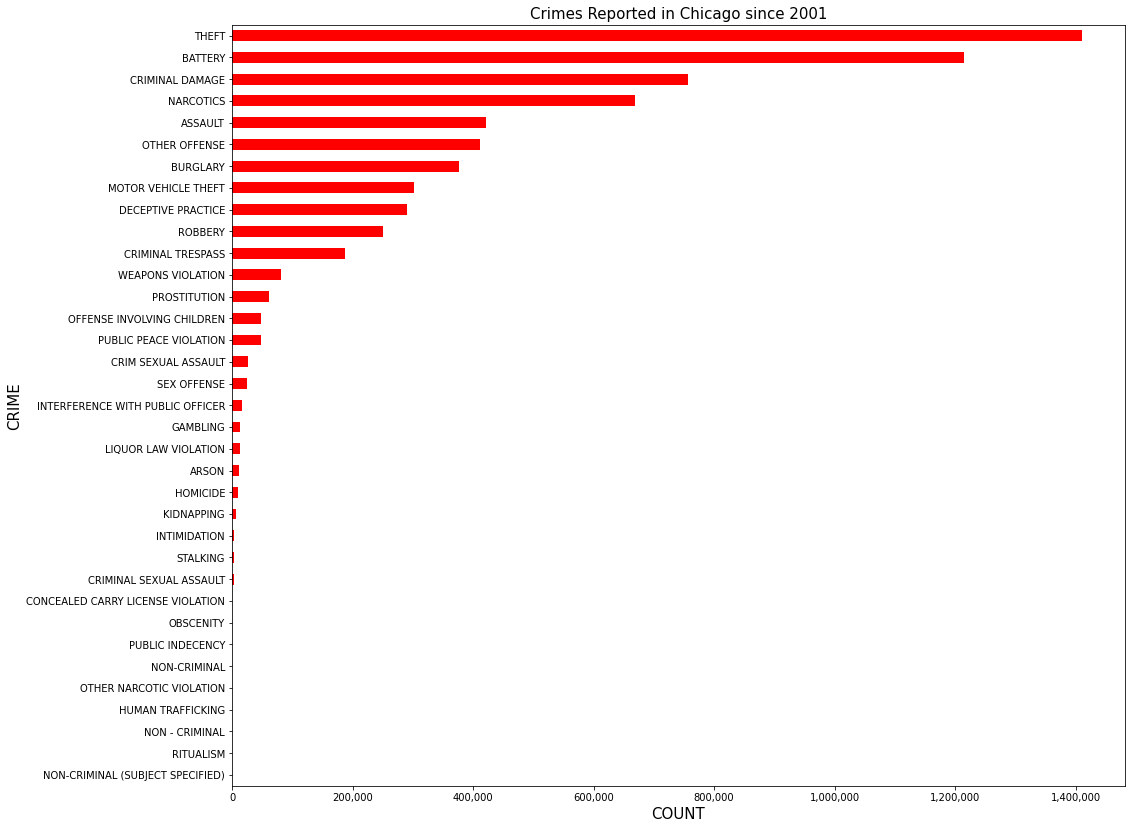

In [ ]:
# Crime Occurance Bar Diagram
crime_df_fig = crime_df['Primary Type'].value_counts(ascending=True)

fig=plt.figure(figsize=(16, 14))
plt.title("Crimes Reported in Chicago since 2001",fontsize = 15)
plt.xlabel("COUNT", fontsize = 15)
plt.ylabel("CRIME", fontsize = 15)
ax = crime_df_fig.plot(kind='barh', color = 'r')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

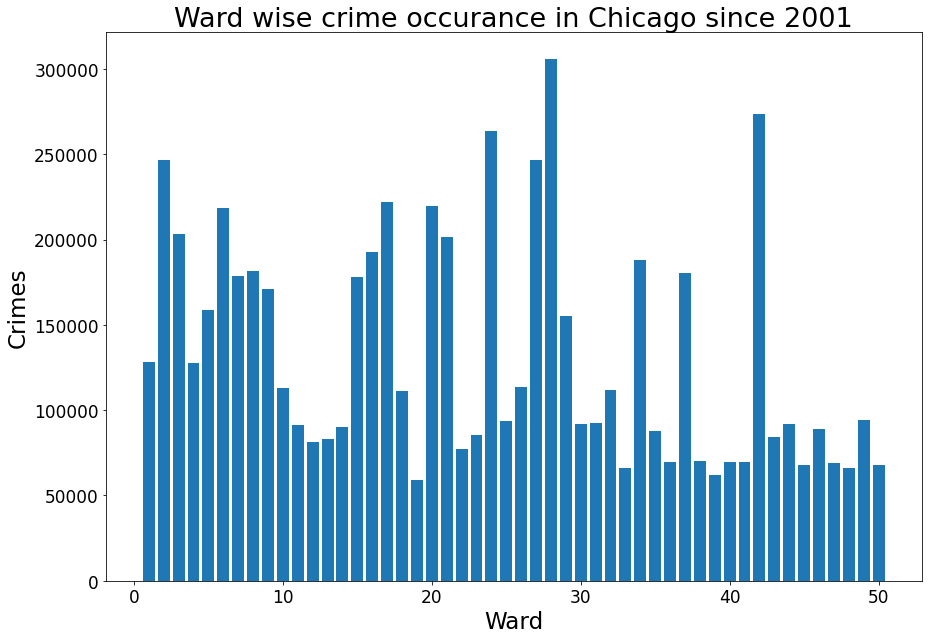

In [ ]:
# Bar Diagram for Ward wise crime occurance since 2001 
wards = crime_df["Ward"].value_counts()

plt.figure(figsize = (13,9))
plt.bar(wards.index,wards)
plt.title('Ward wise crime occurance in Chicago since 2001', fontsize = 27)
plt.xlabel('Ward', fontsize = 23)
plt.ylabel('Crimes', fontsize = 23)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.tight_layout()
plt.show()

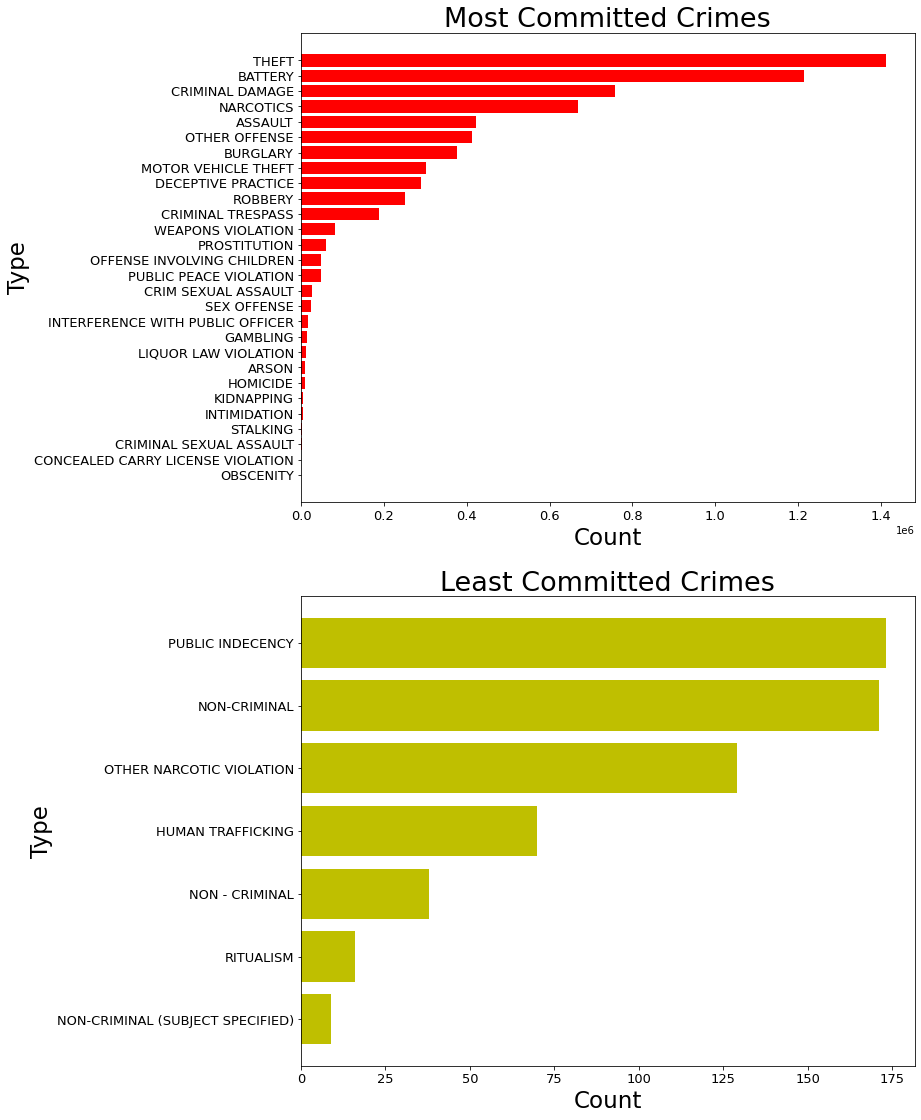

In [ ]:
# Visualization for Most committed and Least committed crimes
crimes = crime_df["Primary Type"].value_counts().sort_values()
mc_crimes = crimes[crimes>500]
lc_crimes = crimes[crimes<500]


plt.rcParams["figure.figsize"] = (11,19)
fig, (cr1,cr2) = plt.subplots(nrows=2, ncols=1)

#Most committed crimes
cr1.barh(mc_crimes.index,width = mc_crimes, color='r')
cr1.set_xlabel("Count", fontsize = 23)
cr1.set_ylabel("Type", fontsize = 23)
cr1.set_title("Most Committed Crimes", fontsize = 27)
cr1.tick_params(axis='y', labelcolor="k", labelsize = 13)
cr1.tick_params(axis='x', labelcolor="k", labelsize = 13)

#Least committed crimes
cr2.barh(lc_crimes.index,width = lc_crimes, color='y')
cr2.set_xlabel("Count", fontsize = 23)
cr2.set_ylabel("Type", fontsize = 23)
cr2.set_title("Least Committed Crimes", fontsize = 27)
cr2.tick_params(axis='y', labelcolor="k", labelsize = 13)
cr2.tick_params(axis='x', labelcolor="k", labelsize = 13)


plt.show()

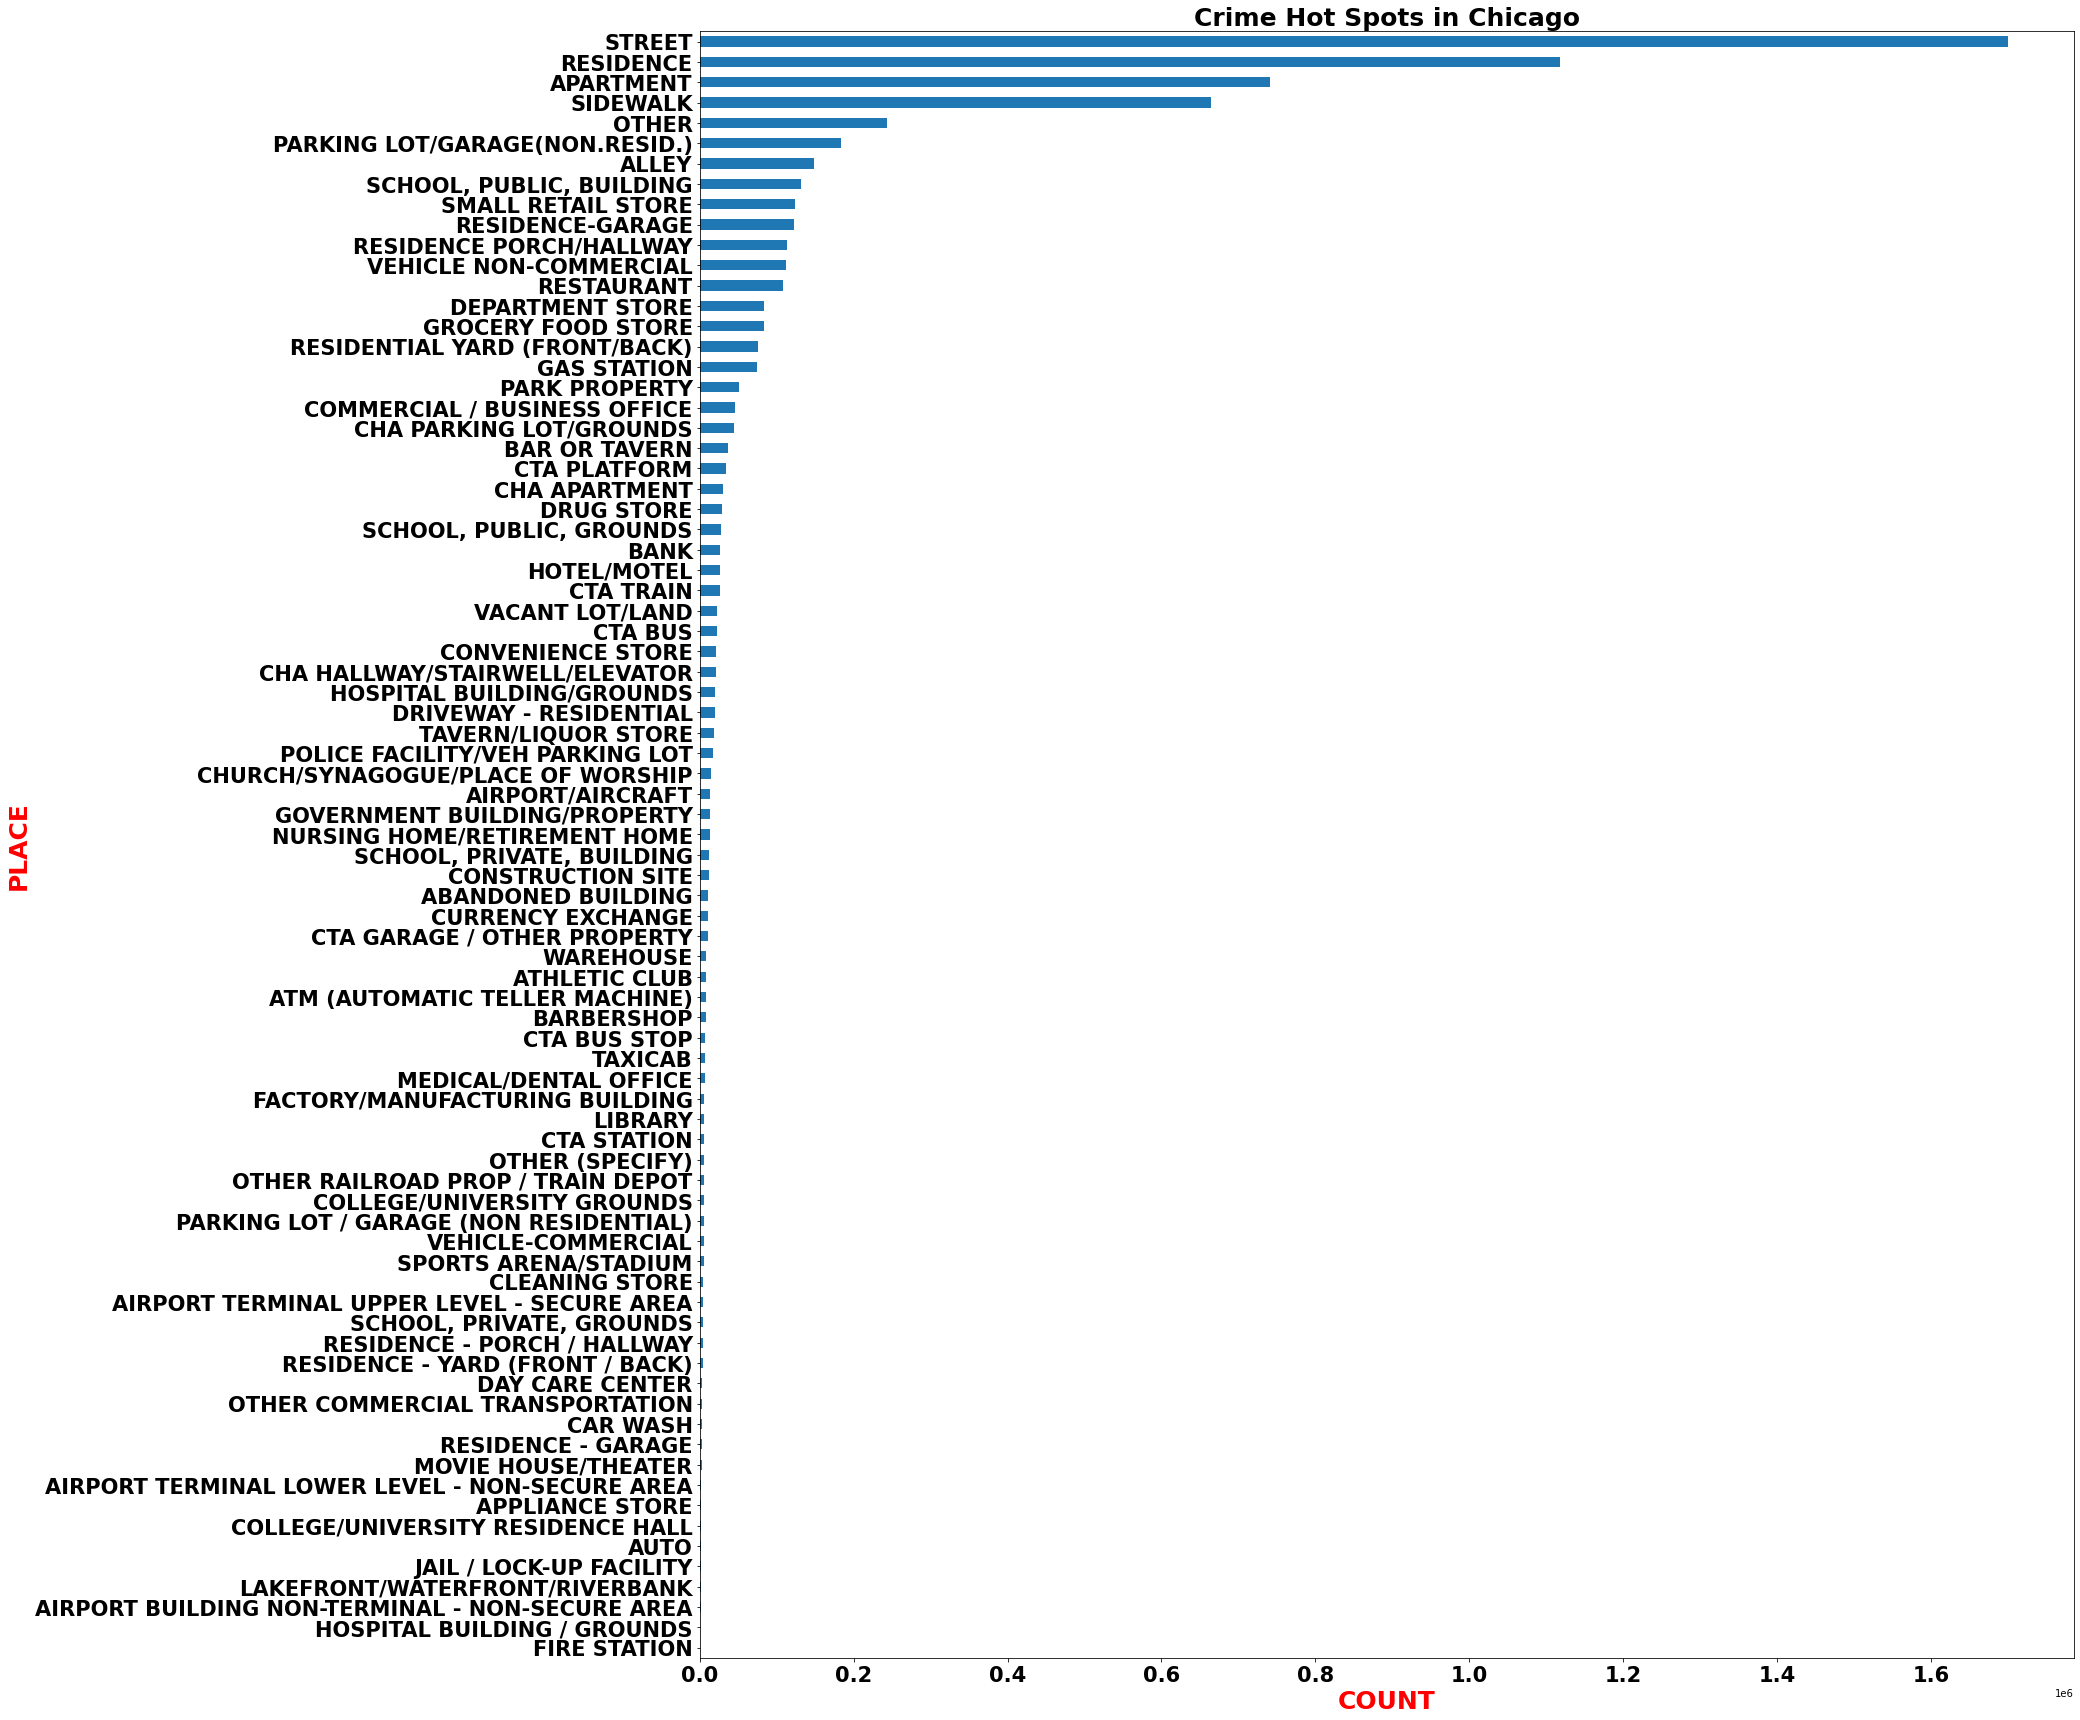

In [ ]:
#Hot Spots for crime in Chicago 
location = crime_df["Location Description"].value_counts().sort_values()
hot_spots = location[location>1000]
hot_spots.plot(kind = "barh", figsize=(29,24))

plt.title('Crime Hot Spots in Chicago',fontsize = 25, weight='bold')
plt.xlabel('COUNT', fontsize = 25, weight='bold', color='r')
plt.ylabel('PLACE', fontsize = 25, weight='bold', color='r')
plt.xticks(fontsize = 21, weight='bold')
plt.yticks(fontsize = 21, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Criminals arrested each year
crime_df['Arrest'].value_counts()

False    4874388
True     1788987
Name: Arrest, dtype: int64

We can see that for total 6,663,375 crimes only 1,788,987 arrests were made, leaving 4,874,388 crimes without any arrest.







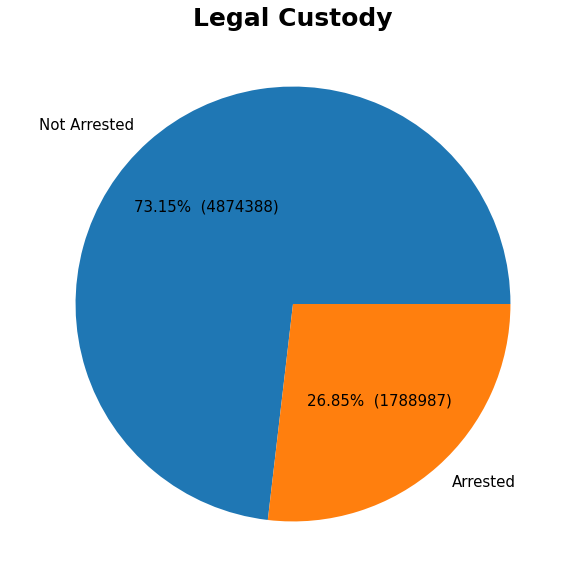

In [ ]:
# Pie Chart Visualization
arrests = crime_df['Arrest'].value_counts()
arrested = (arrests/ crime_df['Arrest'].sum()) * 100 

## Removing the series name in order to display a better looking title
arrested.rename(" ",inplace=True)

## Changing True and False to Arrested and  Not Arrested
arrested.rename({True: 'Arrested', False: 'Not Arrested'},inplace=True)

# Pie Chart Title
plt.title('Legal Custody',fontsize = 25, weight='bold')

# Function to convert values into percentage 
def conv(x):
    def get_val(y):
        gross = sum(x)
        net = int(round(y*gross/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=y,v=net)
    return get_val

arrested.plot.pie(fontsize=15,
                       autopct=conv(crime_df['Arrest'].value_counts()),
                       figsize=(10, 10))



# **Relationship between crime and socio-economic indicators in Chicago**


In [ ]:
# Renaming column Community Area Number to Community Area. In order to merge census dataframe 
# with crime dataframe later the column was renamed since the coulmn in crime data base is named 'Community Area'
census_df.head()
census_df.rename(columns={"Community Area Number":"Community Area"}, inplace=True)
census_df.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
# Correlating crimes with census for 5 years(2008-2012), since census is only available till 2012

# Creating individual crime dataframes for  years(2008-2012) 
crime08 = crime_df.loc[crime_df["Year"]==2008]
crime09 = crime_df.loc[crime_df["Year"]==2009]
crime10 = crime_df.loc[crime_df["Year"]==2010]
crime11 = crime_df.loc[crime_df["Year"]==2011]
crime12 = crime_df.loc[crime_df["Year"]==2012]

# Creating new merged dataframes by merging Crime dataframes with census for  years(2008-2012) 
data08=pd.merge(crime08,census_df,on="Community Area")
data09=pd.merge(crime09,census_df,on="Community Area")
data10=pd.merge(crime10,census_df,on="Community Area")
data11=pd.merge(crime11,census_df,on="Community Area")
data12=pd.merge(crime12,census_df,on="Community Area")

In [ ]:
# Combining the dataframes for (2003-2012) into a combine dataset for 5 years
#crime=pd.concat([data03,data04,data05,data06,data07,data08,data09,data10,data11,data12])
crime=pd.concat([data08,data09,data10,data11,data12])
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [ ]:
# Checking the most frequently committed crime 'THEFT'
theft=crime.loc[crime["Primary Type"]=="THEFT"]
theft

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
2,5991951,HP100750,01/01/2008 01:00:00 AM,001XX W HUBBARD ST,0890,THEFT,FROM BUILDING,TAVERN/LIQUOR STORE,False,False,1831,18.0,42.0,8.0,06,1175266.0,1903291.0,2008,02/28/2018 03:56:25 PM,41.890012,-87.631794,"(41.890011565, -87.631793561)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
7,5999019,HP100533,01/01/2008 01:20:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18.0,42.0,8.0,06,1175825.0,1904582.0,2008,02/28/2018 03:56:25 PM,41.893542,-87.629702,"(41.893541578, -87.629701805)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,5991055,HP100379,01/01/2008 01:30:00 AM,015XX N FREMONT ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1822,18.0,32.0,8.0,06,1169965.0,1910226.0,2008,02/28/2018 03:56:25 PM,41.909159,-87.651059,"(41.90915891, -87.651058517)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9,5991230,HP100609,01/01/2008 01:30:00 AM,002XX W CHICAGO AVE,0890,THEFT,FROM BUILDING,TAVERN/LIQUOR STORE,False,False,1823,18.0,27.0,8.0,06,1174447.0,1905681.0,2008,02/28/2018 03:56:25 PM,41.896588,-87.634730,"(41.896588192, -87.634729801)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
10,5988154,HP100728,01/01/2008 01:30:00 AM,005XX E GRAND AVE,0870,THEFT,POCKET-PICKING,LAKEFRONT/WATERFRONT/RIVERBANK,False,False,1834,18.0,42.0,8.0,06,NaN,NaN,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336082,8938421,HV610047,12/18/2012 09:00:00 AM,131XX S CARVER DR,0820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,False,533,5.0,9.0,54.0,06,1186850.0,1818609.0,2012,02/10/2018 03:50:01 PM,41.657369,-87.591934,"(41.65736912, -87.591933595)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336091,8940676,HV611978,12/21/2012 12:00:00 PM,008XX E 133RD ST,0820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,False,533,5.0,9.0,54.0,06,1184098.0,1817514.0,2012,02/10/2018 03:50:01 PM,41.654429,-87.602038,"(41.654428792, -87.602037533)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336094,8942588,HV614509,12/22/2012 06:30:00 PM,131XX S LANGLEY AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,533,5.0,9.0,54.0,06,1183245.0,1818370.0,2012,02/10/2018 03:50:01 PM,41.656798,-87.605132,"(41.656797601, -87.60513218)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336096,8941945,HV613763,12/23/2012 01:58:00 AM,120XX S DOTY AVE W,0810,THEFT,OVER $500,OTHER,False,False,532,5.0,9.0,54.0,06,1184127.0,1825103.0,2012,02/10/2018 03:50:01 PM,41.675253,-87.601696,"(41.675253432, -87.601695694)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


In [ ]:
# Checking Other Crimes
other_crimes = crime.loc[crime["Primary Type"]!="THEFT"]
other_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,6000315,HP100152,01/01/2008 01:00:00 AM,006XX E GRAND AVE,0460,BATTERY,SIMPLE,OTHER,False,False,1834,18.0,42.0,8.0,08B,1180796.0,1904058.0,2008,02/28/2018 03:56:25 PM,41.891990,-87.611462,"(41.891990384, -87.611461502)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
1,6017724,HP113337,01/01/2008 01:00:00 AM,0000X W DELAWARE PL,0460,BATTERY,SIMPLE,APARTMENT,False,False,1832,18.0,42.0,8.0,08B,1175912.0,1906618.0,2008,02/28/2018 03:56:25 PM,41.899127,-87.629321,"(41.899126506, -87.62932093)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
3,6000092,HP100716,01/01/2008 01:00:00 AM,002XX W ONTARIO ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1831,18.0,42.0,8.0,08B,1174469.0,1904439.0,2008,02/28/2018 03:56:25 PM,41.893180,-87.634686,"(41.893179585, -87.634686145)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
4,6000602,HP101209,01/01/2008 01:00:00 AM,015XX N SHEFFIELD AVE,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1822,18.0,32.0,8.0,08B,1169405.0,1910555.0,2008,02/10/2018 03:50:01 PM,41.910074,-87.653106,"(41.91007391, -87.653106106)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
5,6022810,HP100348,01/01/2008 01:00:00 AM,006XX N CLARK ST,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,False,False,1832,18.0,42.0,8.0,26,1175432.0,1904246.0,2008,02/10/2018 03:50:01 PM,41.892628,-87.631155,"(41.892628411, -87.63115524)",Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336122,8950741,HV623360,12/31/2012 07:00:00 PM,010XX E 132ND ST,031A,ROBBERY,ARMED: HANDGUN,APARTMENT,False,False,533,5.0,9.0,54.0,03,1185681.0,1818026.0,2012,02/10/2018 03:50:01 PM,41.655797,-87.596229,"(41.655796796, -87.596229365)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336123,8950772,HV623403,12/31/2012 07:35:00 PM,010XX E 132ND ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,CHA APARTMENT,True,True,533,5.0,9.0,54.0,14,1185671.0,1818024.0,2012,02/10/2018 03:50:01 PM,41.655792,-87.596266,"(41.655791542, -87.596266018)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336124,8951530,HV623416,12/31/2012 08:00:00 PM,131XX S ELLIS AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,533,5.0,9.0,54.0,14,1185335.0,1818397.0,2012,02/10/2018 03:50:01 PM,41.656823,-87.597484,"(41.656822987, -87.597483806)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0
336125,8951529,HV622848,12/31/2012 11:00:00 AM,131XX S LANGLEY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,533,5.0,9.0,54.0,14,1183245.0,1818342.0,2012,02/10/2018 03:50:01 PM,41.656721,-87.605133,"(41.656720765, -87.605133045)",Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


**Relationship between Theft and Poverty**

In [ ]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].max()

56.5

In [ ]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].min()

3.3

In [ ]:
# Creating a range to accomodate values between 3.3(min) - 56.5(max)
range3 = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55,60]

slot3 = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%"]

theft["Households Below Poverty"] = pd.cut(theft["PERCENT HOUSEHOLDS BELOW POVERTY"],range3, labels=slot3)
pvty=theft["Households Below Poverty"].value_counts()
pvty_df = pd.DataFrame(pvty)

pvty_df["Houses Under Poverty"]= pvty_df["Households Below Poverty"]/1000
pvty_fin=pd.DataFrame(pvty_df["Houses Under Poverty"].sort_index())
pvty_fin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Houses Under Poverty
0-5%,1.462
5-10%,14.907
10-15%,131.486
15-20%,66.578
20-25%,41.642
25-30%,74.796
30-35%,35.624
35-40%,0.764
40-45%,20.108
45-50%,7.192


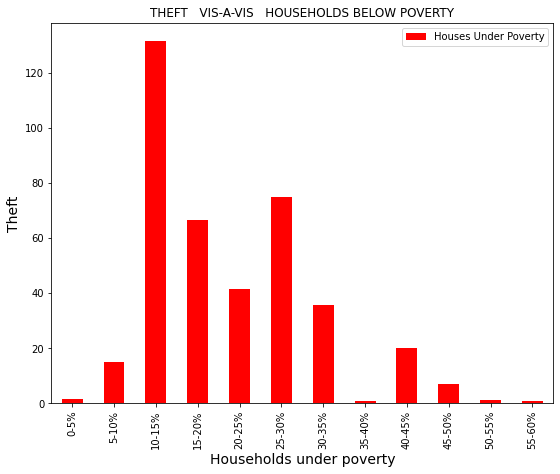

In [ ]:
# Visual Representation for Relationship between Theft and Households under Poverty
pvty_fin.plot(kind="bar", figsize=(21,4),color='r')

# Set a title for the chart
fig = plt.gcf() 
fig.set_size_inches(9, 7)
plt.xlabel("Households under poverty", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)
plt.title("THEFT   VIS-A-VIS   HOUSEHOLDS BELOW POVERTY")
plt.show()


Interestingly Theft is low in areas with low poverty rate as well as high poverty rate, areas with 10-15% households below poverty have an exponentionally high rate for Theft.

**Relationship between Theft and people Aged 25+ without a High School Diploma**





In [ ]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].max()

54.8

In [ ]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].min()

2.5

In [ ]:
# Creating a range to accommodate values between 2.5(min) - 54.8(max)
range1 = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55]

slot1 = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%"]

theft["High School Diploma Holders"] = pd.cut(theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"], range1, labels=slot1)
dip=theft["High School Diploma Holders"].value_counts()/1000

dip_fin=pd.DataFrame(dip.sort_index())
dip_fin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,High School Diploma Holders
0-5%,87.130
5-10%,27.213
10-15%,85.406
15-20%,54.179
20-25%,50.149
25-30%,32.125
30-35%,20.339
35-40%,18.166
40-45%,11.150
45-50%,2.834


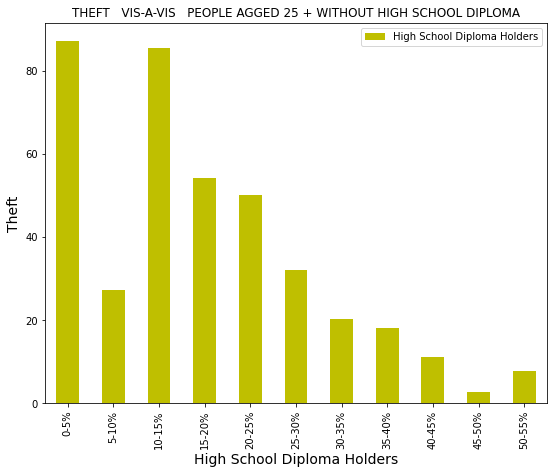

In [ ]:
# Visual Representation for Relationship between Theft and people Aged 25+ without a High School Diploma
dip_fin.plot(kind="bar", figsize=(21,4),color='y')

fig = plt.gcf() 
fig.set_size_inches(9, 7)
plt.xlabel("High School Diploma Holders", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)
plt.title("THEFT   VIS-A-VIS   PEOPLE AGGED 25 + WITHOUT HIGH SCHOOL DIPLOMA")

plt.show()

We can see that normally Theft is high in areas where High Scool Diploma holders are low, with an exception for areas where the population comprises of 5-10 % of Diploma holders.

**Relationship between Theft and Unemployed people over 16 years of Age**

In [ ]:
theft["PERCENT AGED 16+ UNEMPLOYED"].max()

35.9

In [ ]:
theft["PERCENT AGED 16+ UNEMPLOYED"].min()

4.7

In [ ]:
# Creating a range to accommodate values between 4.7(min) – 35.9(max)
range2 = [0, 5, 10, 15, 20, 25,30,35,40]

slot2 = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%"]

theft["16 + Unemployed"] = pd.cut(theft["PERCENT AGED 16+ UNEMPLOYED"], range2, labels=slot2)
un_emp=theft["16 + Unemployed"].value_counts()/1000

un_emp_fin=pd.DataFrame(un_emp.sort_index())
un_emp_fin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,16 + Unemployed
0-5%,18.902
5-10%,157.581
10-15%,53.089
15-20%,66.925
20-25%,67.238
25-30%,22.409
30-35%,1.968
35-40%,8.415


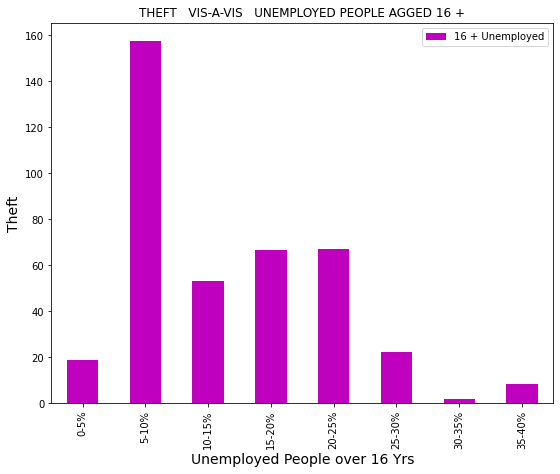

In [ ]:
# Visual Representation for Relationship between Theft and Unemployed people over 16 years of age
un_emp_fin.plot(kind="bar", figsize=(21,4),color='m')

# Set a title for the chart
fig = plt.gcf() 
fig.set_size_inches(9, 7)
plt.xlabel("Unemployed People over 16 Yrs", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)

plt.title("THEFT   VIS-A-VIS   UNEMPLOYED PEOPLE AGGED 16 +")

plt.show()


Areas with low unemployment rates have fewer incidents of crime, interestingly Theft is exponentially high in areas where unemployment rate is between (5%-10%)  as compared to other areas.


**Relationship between Theft and Crowded Housing**

In [ ]:

theft["PERCENT OF HOUSING CROWDED"].max()

15.8

In [ ]:
theft["PERCENT OF HOUSING CROWDED"].min()

0.3

In [ ]:
# Creating a range to accommodate values between 0.3(min) - 15.8(max)
range4 = [0, 4,8,12,16]

slot4 = ["0-4%", "4-8%", "8-12%", "12-16%"]

theft["Housing Crowded"] = pd.cut(theft["PERCENT OF HOUSING CROWDED"], range4, labels=slot4)
hs_crwd=theft["Housing Crowded"].value_counts()/1000

hs_crwd_fin = pd.DataFrame(hs_crwd)
hs_crwd_fin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Housing Crowded
0-4%,249.247
4-8%,95.675
8-12%,33.040
12-16%,18.565


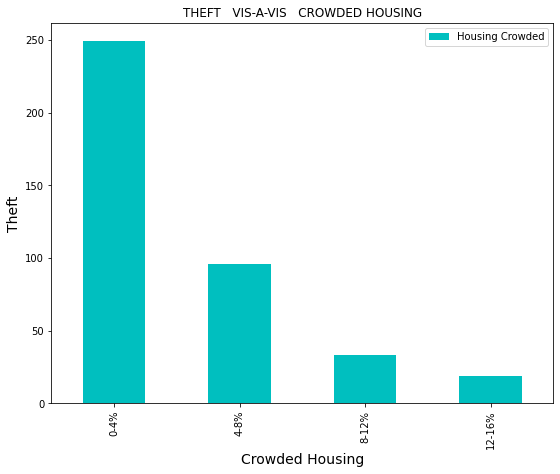

In [ ]:
# Visual Representation for Relationship between Theft and Crowded Housing
hs_crwd_fin.plot(kind="bar", figsize=(21,4),color='c')

fig = plt.gcf() 
fig.set_size_inches(9, 7)
plt.xlabel("Crowded Housing", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)
plt.title("THEFT   VIS-A-VIS   CROWDED HOUSING")

plt.show()


Areas where houses are less crowded are more prone to Theft as compared to ares with heavily crowded housing.

**Relationship between Theft and Per Capita Income**

In [ ]:
theft["PER CAPITA INCOME "].max()

88669

In [ ]:

theft["PER CAPITA INCOME "].min()

8201

In [ ]:
# Creating a range to accommodate values between 8201(min) - 88669(max)
range5 = [0, 10000,20000,30000,40000,50000,60000,70000,80000,90000]

slot5 = ["0-10,000", "10,000-20,000", "20,000-30,000", "30,000-40,000","40,000-50,000","50,000-60,000","60,000-70,000","70,000-80,000","80,000-90,000" ]

theft["Average Income"] = pd.cut(theft["PER CAPITA INCOME "], range5, labels=slot5)
inc=theft["Average Income"].value_counts()/1000
inc_fin=pd.DataFrame(inc.sort_index())
inc_fin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Average Income
"0-10,000",0.758
"10,000-20,000",169.521
"20,000-30,000",67.005
"30,000-40,000",38.125
"40,000-50,000",37.674
"50,000-60,000",7.566
"60,000-70,000",36.036
"70,000-80,000",13.444
"80,000-90,000",26.398


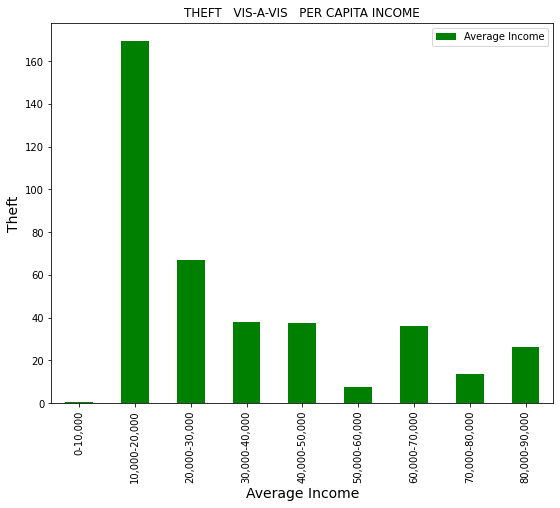

In [ ]:
# Visual Representation for Relationship between Theft and Per Capita Income
inc_fin.plot(kind="bar", figsize=(21,4),color='g')

# Set a title for the chart
fig = plt.gcf() 
fig.set_size_inches(9,7)
plt.xlabel("Average Income", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)
plt.title("THEFT   VIS-A-VIS   PER CAPITA INCOME")
plt.show()


Theft is exponentially High in areas where average income is between 10,000 - 20,000.

**Relationship between Theft and Hardship index**

In [ ]:
theft['HARDSHIP INDEX'].max()

98.0

In [ ]:
theft['HARDSHIP INDEX'].min()

1.0

In [ ]:
# Creating a range to accommodate values between 1(min) - 98(max)
range6 = [0, 10,20,30,40,50,60,70,80,90,100]

slot6 = ["0-10", "10-20", "20-30", "30-40","40-50","50-60","60-70","70-80","80-90","90-100" ]

crime["Hardship_Index"] = pd.cut(crime['HARDSHIP INDEX'], range6, labels=slot6)
hi=crime["Hardship_Index"].value_counts()/1000
hi_fin=pd.DataFrame(hi.sort_index())
hi_fin


,Hardship_Index
0-10,247.952
10-20,132.718
20-30,111.659
30-40,123.626
40-50,111.386
50-60,250.170
60-70,160.947
70-80,299.783
80-90,250.634
90-100,188.562


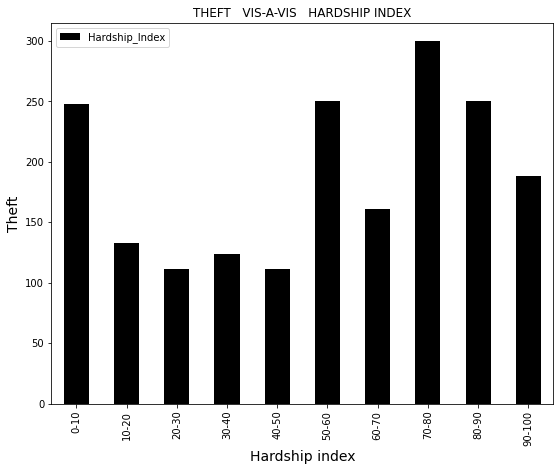

In [ ]:
# Visual Representation for Relationship between Theft and Per Capita Income
hi_fin.plot(kind="bar", figsize=(21,4),color='k')

fig = plt.gcf() 
fig.set_size_inches(9, 7)
plt.xlabel("Hardship index", fontsize = 14)
plt.ylabel("Theft", fontsize = 14)
plt.title("THEFT   VIS-A-VIS   HARDSHIP INDEX")

plt.show()


# Crime Prediction

**Using Facebook's Prophet Library for Predictions**


In [ ]:
!pip install pystan fbprophet

In [ ]:
#importing facebook prophet
from fbprophet import Prophet

In [ ]:
#Converting column date's datatype from int to Date, in order to resample the timeseries and used by Prophet
crime_df.Date = pd.to_datetime(crime_df.Date, format='%m/%d/%Y %I:%M:%S %p')
crime_df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [ ]:
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3206463,HK204378,2001-01-01 01:00:00,027XX W 87TH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,70.0,02,1159813.0,1846866.0,2001,03/31/2006 10:03:38 PM,41.735507,-87.690095,"(41.735507018, -87.690094853)"
1,5462733,HN290220,2001-01-01 01:00:00,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)"
2,3212105,HK228274,2001-01-01 01:00:00,029XX W 38TH PL,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,58.0,02,1157298.0,1878997.0,2001,03/31/2006 10:03:38 PM,41.823730,-87.698440,"(41.823730366, -87.69843979)"
3,3769790,HL141452,2001-01-01 13:00:00,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)"
4,6808288,HR218860,2001-01-01 13:00:00,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)"


In [ ]:
# Setting date as the index of dataframe,
# Getting Year wise crime count using resample method
crime_df.index = pd.DatetimeIndex(crime_df.Date)
crime_df.resample('Y').size()

Date
2001-12-31      4191
2002-12-31    353619
2003-12-31    475912
2004-12-31    469331
2005-12-31    453689
2006-12-31    448091
2007-12-31    436890
2008-12-31    426869
2009-12-31    392561
2010-12-31    370209
2011-12-31    351694
2012-12-31    336128
2013-12-31    307327
2014-12-31    275582
2015-12-31    264495
2016-12-31    269519
2017-12-31    268733
2018-12-31    268307
2019-12-31    260528
2020-12-31    209873
2021-12-31     19827
Freq: A-DEC, dtype: int64

In [ ]:
# Resampling and creating a new dataframe to store the resample based data, instead of deleting columns later and renaming them 
crime_pred=crime_df.resample('M').size().reset_index()
crime_pred

,Date,0
0,2001-01-31,490
1,2001-02-28,183
2,2001-03-31,209
3,2001-04-30,258
4,2001-05-31,250
...,...,...
237,2020-10-31,18217
238,2020-11-30,16353
239,2020-12-31,16099
240,2021-01-31,15420


In [ ]:
# Setting the columns 
crime_pred.columns= ['Date', 'Crime']
crime_pred

,Date,Crime
0,2001-01-31,490
1,2001-02-28,183
2,2001-03-31,209
3,2001-04-30,258
4,2001-05-31,250
...,...,...
237,2020-10-31,18217
238,2020-11-30,16353
239,2020-12-31,16099
240,2021-01-31,15420


In [ ]:
#Renaming the columns to 'ds' and 'y' in order to be used by prophet
crime_pred.rename(columns={'Date':'ds', 'Crime':'y'},inplace=True)
crime_pred

,ds,y
0,2001-01-31,490
1,2001-02-28,183
2,2001-03-31,209
3,2001-04-30,258
4,2001-05-31,250
...,...,...
237,2020-10-31,18217
238,2020-11-30,16353
239,2020-12-31,16099
240,2021-01-31,15420


In [ ]:
# Creating an insrtance of prophet and passing the resampled dataframe as a parameter
model = Prophet()
model.fit(crime_pred)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
crime_pred.tail()

,ds,y
237,2020-10-31,18217
238,2020-11-30,16353
239,2020-12-31,16099
240,2021-01-31,15420
241,2021-02-28,4407


The last row above shows the latest crime that was stored in the dataframe

In [ ]:
# Making Predictions for 60 months(5 years) from the end of the data in our data frame above(28 feb-2021)
ftr = model.make_future_dataframe(periods=60, freq='m')
prdc = model.predict(ftr)
prdc

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,22340.952834,8558.253946,27867.843131,22340.952834,22340.952834,-4558.947799,-4558.947799,-4558.947799,-4558.947799,-4558.947799,-4558.947799,0.0,0.0,0.0,17782.005035
1,2001-02-28,22543.742080,7245.779300,26334.026334,22543.742080,22543.742080,-6509.910275,-6509.910275,-6509.910275,-6509.910275,-6509.910275,-6509.910275,0.0,0.0,0.0,16033.831805
2,2001-03-31,22768.258745,10961.964251,29885.582266,22768.258745,22768.258745,-2244.147898,-2244.147898,-2244.147898,-2244.147898,-2244.147898,-2244.147898,0.0,0.0,0.0,20524.110847
3,2001-04-30,22985.532936,12231.965289,30391.326207,22985.532936,22985.532936,-1903.167505,-1903.167505,-1903.167505,-1903.167505,-1903.167505,-1903.167505,0.0,0.0,0.0,21082.365431
4,2001-05-31,23210.049601,15774.017289,34131.101824,23210.049601,23210.049601,1848.281399,1848.281399,1848.281399,1848.281399,1848.281399,1848.281399,0.0,0.0,0.0,25058.331000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2025-10-31,10411.443785,2131.722649,21674.377034,8588.207569,12181.555558,1452.631016,1452.631016,1452.631016,1452.631016,1452.631016,1452.631016,0.0,0.0,0.0,11864.074800
298,2025-11-30,10292.578011,-626.343519,18336.906318,8419.150813,12093.697578,-1486.209771,-1486.209771,-1486.209771,-1486.209771,-1486.209771,-1486.209771,0.0,0.0,0.0,8806.368240
299,2025-12-31,10169.750044,-2199.727900,17508.456746,8231.230602,12030.511044,-2862.743366,-2862.743366,-2862.743366,-2862.743366,-2862.743366,-2862.743366,0.0,0.0,0.0,7307.006678
300,2026-01-31,10046.922077,-3127.709592,15489.076795,8070.290055,11940.547956,-3805.037200,-3805.037200,-3805.037200,-3805.037200,-3805.037200,-3805.037200,0.0,0.0,0.0,6241.884877


column 'yhat' at the right holds the predictions.


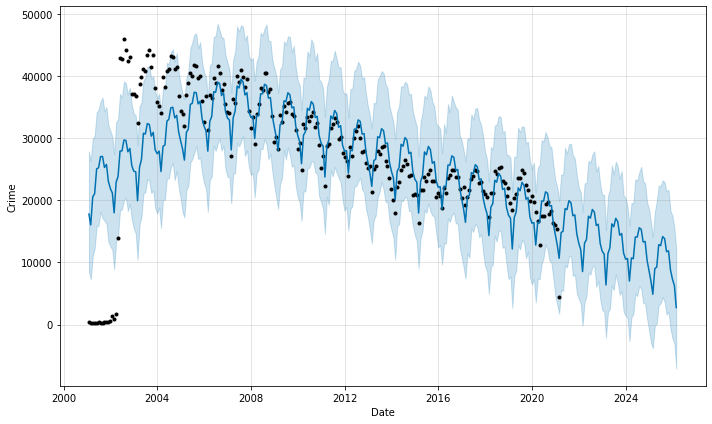

In [ ]:
# Graphical representation of Prediction
Prediction_graph = model.plot(prdc, xlabel='Date', ylabel='Crime')

The Blue line above denotes the predicctions and the black points denote actual values from the dataset.

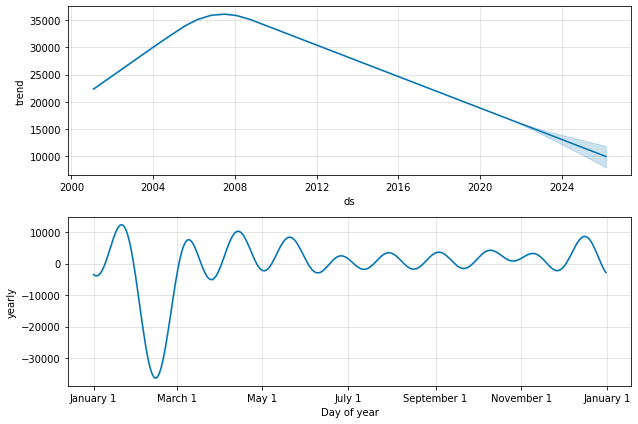

In [ ]:
#Representation of Prediction in form of curves
prediction_curve = model.plot_components(prdc)

The predictions above denote a drop in crime level in 2026
